# Predict Bike Sharing Demand with AutoGluon Template

# Notes:
I ran the notebook in Google Colab but forgot to download the images and have to rerun again. Because of that, the actual value of submissions displayed in the outputs varied from the first time. The images also died.

In [1]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = ""
kaggle_key = ""

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [3]:
!kaggle competitions submissions -c bike-sharing-demand

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_hpo_1.csv     2023-05-26 08:41:56  new features with increased time limit  complete  0.67834      0.67834       
submission_new_hpo.csv       2023-05-26 08:19:14  new features with hyperparameters       complete  0.61537      0.61537       
submission_new_features.csv  2023-05-26 08:06:23  new features                            complete  0.63415      0.63415       
submission.csv               2023-05-26 07:53:31  first raw submission                    complete  1.81590      1.81590       
submission.csv               2023-05-26 06:48:23  gradient boosting with GridSearchCV     complete  0.38863      0.38863       
submission_new_hpo_1.csv     2023-05-26 06:27:38  new features with increased time limit  complete  0.67

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
%%capture
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train.loc[:,'datetime'] = pd.to_datetime(train.loc[:,'datetime'])
train.loc[:,'season':'weather'] = train.loc[:,'season':'weather'].astype('category')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


<ipython-input-62-06ebcf61b891>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:,'datetime'] = pd.to_datetime(train.loc[:,'datetime'])


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.loc[:,'datetime'] = pd.to_datetime(test.loc[:,'datetime'])
test.loc[:,'season':'weather'] = test.loc[:,'season':'weather'].astype('category')
test.head()

<ipython-input-64-3333bdc5bf54>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:,'datetime'] = pd.to_datetime(test.loc[:,'datetime'])


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   category      
 2   holiday     6493 non-null   category      
 3   workingday  6493 non-null   category      
 4   weather     6493 non-null   category      
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: category(4), datetime64[ns](1), float64(3), int64(1)
memory usage: 279.8 KB


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  6493 non-null   datetime64[ns]
 1   count     6493 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 101.6 KB


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(label='count',
                             problem_type='regression',
                             learner_kwargs = {'ignored_columns': ['casual', 'registered']}
                             ).fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230526_074151/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230526_074151/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11701.54 MB
	Train Data (Original)  Memory Usage: 0.48 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the featur

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.576096      30.010471  478.078084                0.001048           0.278779            3       True         12
1   RandomForestMSE_BAG_L2  -53.291017      28.741719  424.229200                0.838891          43.271575            2       True         10
2     ExtraTreesMSE_BAG_L2  -53.382756      28.750743  398.135309                0.847916          17.177684            2       True         11
3          LightGBM_BAG_L2  -54.793168      28.322617  417.350047                0.419789          36.392422            2       True          9
4        LightGBMXT_BAG_L2  -61.072182      38.575348  463.859215               10.672520          82.901590            2       True          8
5    KNeighborsDist_BAG_L1  -84.125061       0.043805    0.036887         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.15924850163722,
  'LightGBM_BAG_L1': -130.67501424016515,
  'RandomForestMSE_BAG_L1': -116.62536550916602,
  'CatBoost_BAG_L1': -133.7724377937292,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2

<Axes: xlabel='model'>

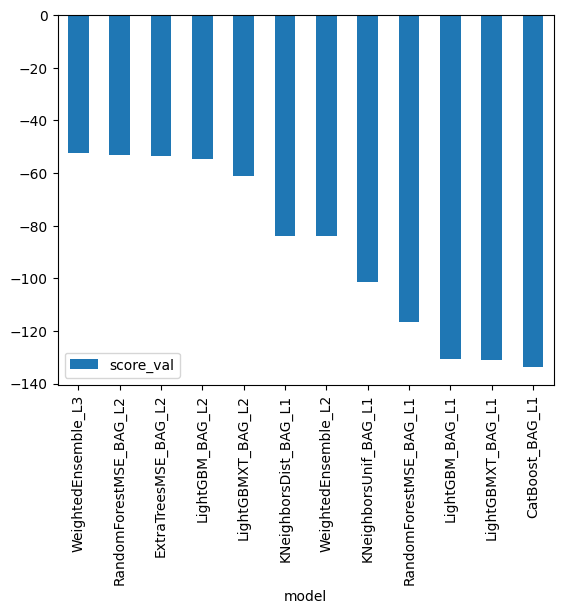

In [ ]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    23.171047
1    41.330738
2    45.296040
3    48.605858
4    51.984993
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.268829
std        90.229675
min         3.072221
25%        19.915821
50%        62.896004
75%       170.020111
max       363.827271
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
predictions.lt(0).sum()

0

In [ ]:
# Set them to zero
predictions[predictions.lt(0)] = 0
predictions.head()

0    23.171047
1    41.330738
2    45.296040
3    48.605858
4    51.984993
Name: count, dtype: float32

In [ ]:
predictions.lt(0).sum()

0

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:02<00:00, 78.9kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission.csv               2023-05-26 07:53:31  first raw submission                    complete  1.81590      1.81590       
submission.csv               2023-05-26 06:48:23  gradient boosting with GridSearchCV     complete  0.38863      0.38863       
submission_new_hpo_1.csv     2023-05-26 06:27:38  new features with increased time limit  complete  0.67070      0.67070       
submission_new_hpo.csv       2023-05-26 06:02:10  new features with hyperparameters       complete  0.64431      0.64431       


#### Initial score of $1.78725$

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

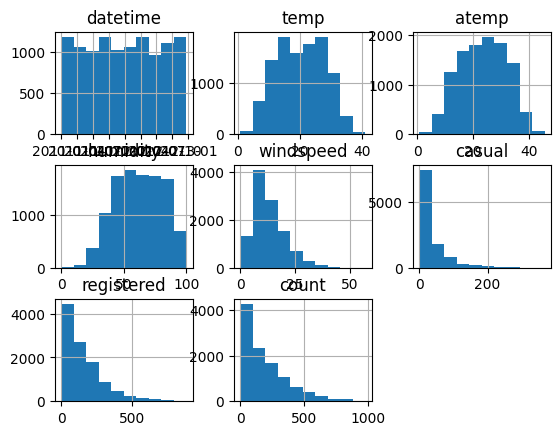

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist();

In [ ]:
# create a new feature
train['hour'] = train.datetime.dt.hour
test['hour'] = test.datetime.dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
# Accidentally done above
# train["season"] = ?
# train["weather"] = ?
# test["season"] = ?
# test["weather"] = ?

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(5)
memory usage: 808.7 KB


In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


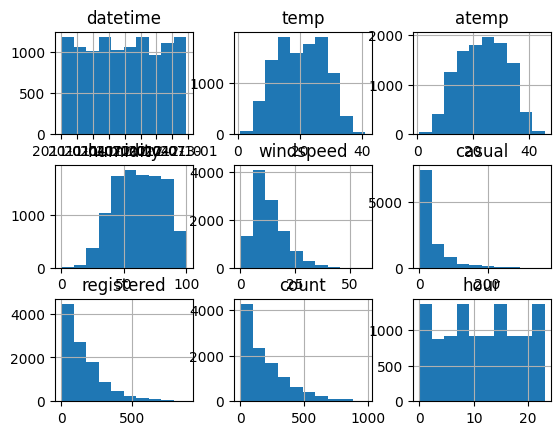

In [ ]:
# View histogram of all features again now with the hour feature
train.hist();

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label='count',
                             problem_type='regression',
                             learner_kwargs = {'ignored_columns': ['casual', 'registered']}
                             ).fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230526_075339/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230526_075339/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10841.68 MB
	Train Data (Original)  Memory Usage: 0.57 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the featur

In [ ]:
predictor_new_features.fit_summary()

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.319297      66.501119  551.807319                0.001804           1.254721            3       True         11
1          LightGBM_BAG_L2  -30.542002      63.428139  432.209137                0.764104          47.804294            2       True          9
2        LightGBMXT_BAG_L2  -31.070389      64.941408  446.419285                2.277373          62.014441            2       True          8
3   RandomForestMSE_BAG_L2  -31.894055      63.457839  440.733863                0.793804          56.329019            2       True         10
4      WeightedEnsemble_L2  -32.325810      62.589321  384.957622                0.001415           0.639061            2       True          7
5          LightGBM_BAG_L1  -33.919639      13.706392   75.390034         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.457273921492806,
  'LightGBM_BAG_L1': -33.919639163586254,
  'RandomForestMSE_BAG_L1': -38.4543378929385,
  'CatBoost_BAG_L1': -36.26453917834972,
  'WeightedEnsemble_L2': -32.32580987990545,
  'LightGBMXT_BAG_L2': -31.0703892512367,
  'LightGBM_BAG_L2': -30.54200200

In [ ]:
# Remember to set all negative values to zero
predictions = predictor_new_features.predict(test)
predictions.head()

0    16.392593
1    10.719270
2     9.713212
3     8.117026
4     7.385385
Name: count, dtype: float32

In [ ]:
predictions.describe()

count    6493.000000
mean      161.544159
std       143.743500
min         2.417932
25%        49.388428
50%       123.076050
75%       230.734970
max       808.913086
Name: count, dtype: float64

In [ ]:
predictions[predictions.lt(0)] = 0
predictions.head()

0    16.392593
1    10.719270
2     9.713212
3     8.117026
4     7.385385
Name: count, dtype: float32

In [ ]:
submission_new_features = submission

In [ ]:
# Same submitting predictions
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:03<00:00, 61.3kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-26 08:06:23  new features                            complete  0.63415      0.63415       
submission.csv               2023-05-26 07:53:31  first raw submission                    complete  1.81590      1.81590       
submission.csv               2023-05-26 06:48:23  gradient boosting with GridSearchCV     complete  0.38863      0.38863       
submission_new_hpo_1.csv     2023-05-26 06:27:38  new features with increased time limit  complete  0.67070      0.67070       


#### New Score of $0.63239$

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
predictor_new_hpo = TabularPredictor(label='count',
                             problem_type='regression',
                             eval_metric='r2',
                             learner_kwargs = {'ignored_columns': ['casual', 'registered']}
                             ).fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230526_080624/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230526_080624/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10794.66 MB
	Train Data (Original)  Memory Usage: 0.57 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the featur

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.971930      79.231010  563.399022                0.001140           0.237546            3       True         11
1          LightGBM_BAG_L2   0.971605      74.535056  444.651903                0.458614          48.125891            2       True          9
2        LightGBMXT_BAG_L2   0.970303      77.929162  468.424308                3.852720          71.898297            2       True          8
3   RandomForestMSE_BAG_L2   0.969165      74.918536  443.137288                0.842094          46.611276            2       True         10
4      WeightedEnsemble_L2   0.968108      73.824237  322.167844                0.001758           0.864281            2       True          7
5          LightGBM_BAG_L1   0.964927      11.519504   84.312454               1

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6857197008702899,
  'KNeighborsDist_BAG_L1': 0.7843047406609882,
  'LightGBMXT_BAG_L1': 0.9638025771530867,
  'LightGBM_BAG_L1': 0.9649265782277123,
  'RandomForestMSE_BAG_L1': 0.9549307335507177,
  'CatBoost_BAG_L1': 0.951849543275297,
  'WeightedEnsemble_L2': 0.9681075327164346,
  'LightGBMXT_BAG_L2': 0.9703027791837092,
  'LightGBM_BAG_L2': 0.971605323405

In [ ]:
# Remember to set all negative values to zero
predictions = predictor_new_hpo.predict(test)
predictions[predictions.lt(0)] = 0
predictions.describe()

count    6493.000000
mean      162.723816
std       145.281219
min         2.635452
25%        48.570057
50%       124.284653
75%       232.908966
max       814.439636
Name: count, dtype: float64

In [ ]:
# Same submitting predictions
submission_new_hpo = submission
submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:01<00:00, 108kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-26 08:19:14  new features with hyperparameters       complete  0.61537      0.61537       
submission_new_features.csv  2023-05-26 08:06:23  new features                            complete  0.63415      0.63415       
submission.csv               2023-05-26 07:53:31  first raw submission                    complete  1.81590      1.81590       
submission.csv               2023-05-26 06:48:23  gradient boosting with GridSearchCV     complete  0.38863      0.38863       


#### New Score of $0.64431$

In [ ]:
predictor_new_hpo_1 = TabularPredictor(label='count',
                             problem_type='regression',
                             learner_kwargs = {'ignored_columns': ['casual', 'registered']}
                             ).fit(train_data=train, time_limit=1200, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230526_081916/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/ag-20230526_081916/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10929.8 MB
	Train Data (Original)  Memory Usage: 0.57 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the featur

In [ ]:
predictions = predictor_new_hpo_1.predict(test)
predictions[predictions.lt(0)] = 0

submission_new_hpo_1 = submission
submission_new_hpo_1["count"] = predictions
submission_new_hpo_1.to_csv("submission_new_hpo_1.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_1.csv -m "new features with increased time limit"

100% 188k/188k [00:02<00:00, 71.2kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_hpo_1.csv     2023-05-26 08:41:56  new features with increased time limit  complete  0.67834      0.67834       
submission_new_hpo.csv       2023-05-26 08:19:14  new features with hyperparameters       complete  0.61537      0.61537       
submission_new_features.csv  2023-05-26 08:06:23  new features                            complete  0.63415      0.63415       
submission.csv               2023-05-26 07:53:31  first raw submission                    complete  1.81590      1.81590       


In [ ]:
predictor_new_hpo_1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.199478      55.004992  1130.887688                0.001097           0.341997            3       True         15
1          CatBoost_BAG_L2  -30.506111      51.629967   947.708823                0.235660         148.008132            2       True         13
2          LightGBM_BAG_L2  -30.587053      51.955949   848.236876                0.561642          48.536185            2       True         11
3        LightGBMXT_BAG_L2  -31.113891      53.417851   859.029948                2.023544          59.329256            2       True         10
4     ExtraTreesMSE_BAG_L2  -31.357742      52.278236   817.622905                0.883929          17.922213            2       True         14
5   RandomForestMSE_BAG_L2  -31.545151      52.183049   874.672117  

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.457273921492806,
  'LightGBM_BAG_L1': -

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
%matplotlib inline
%config InlineBackend.figure_format='retina'

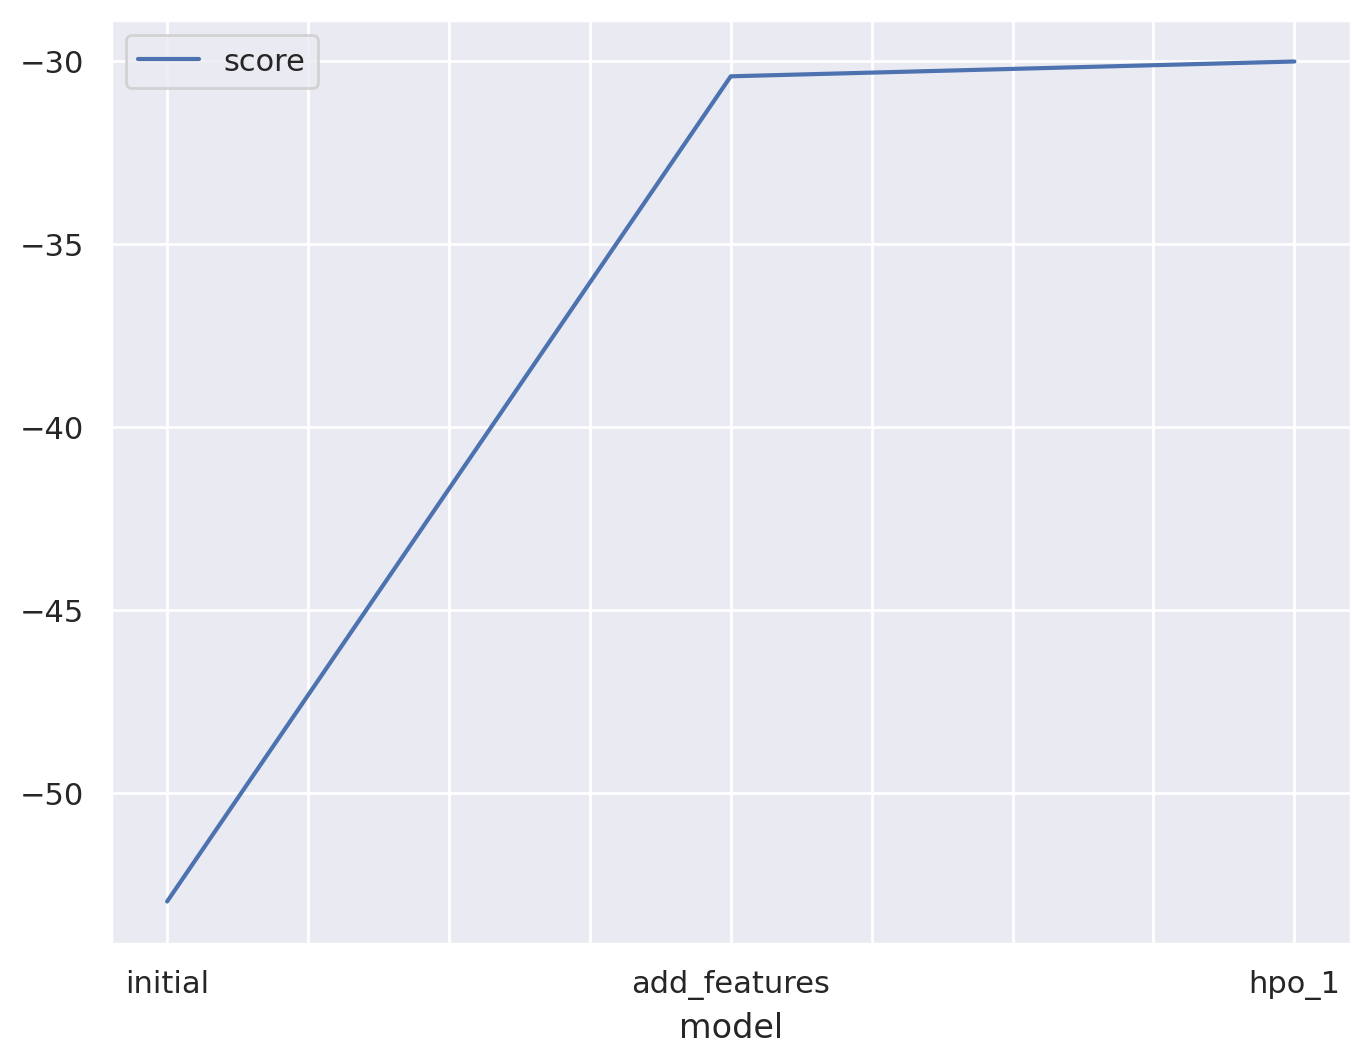

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo_1"],
        "score": [-52.964901, -30.409717, -30.004796]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

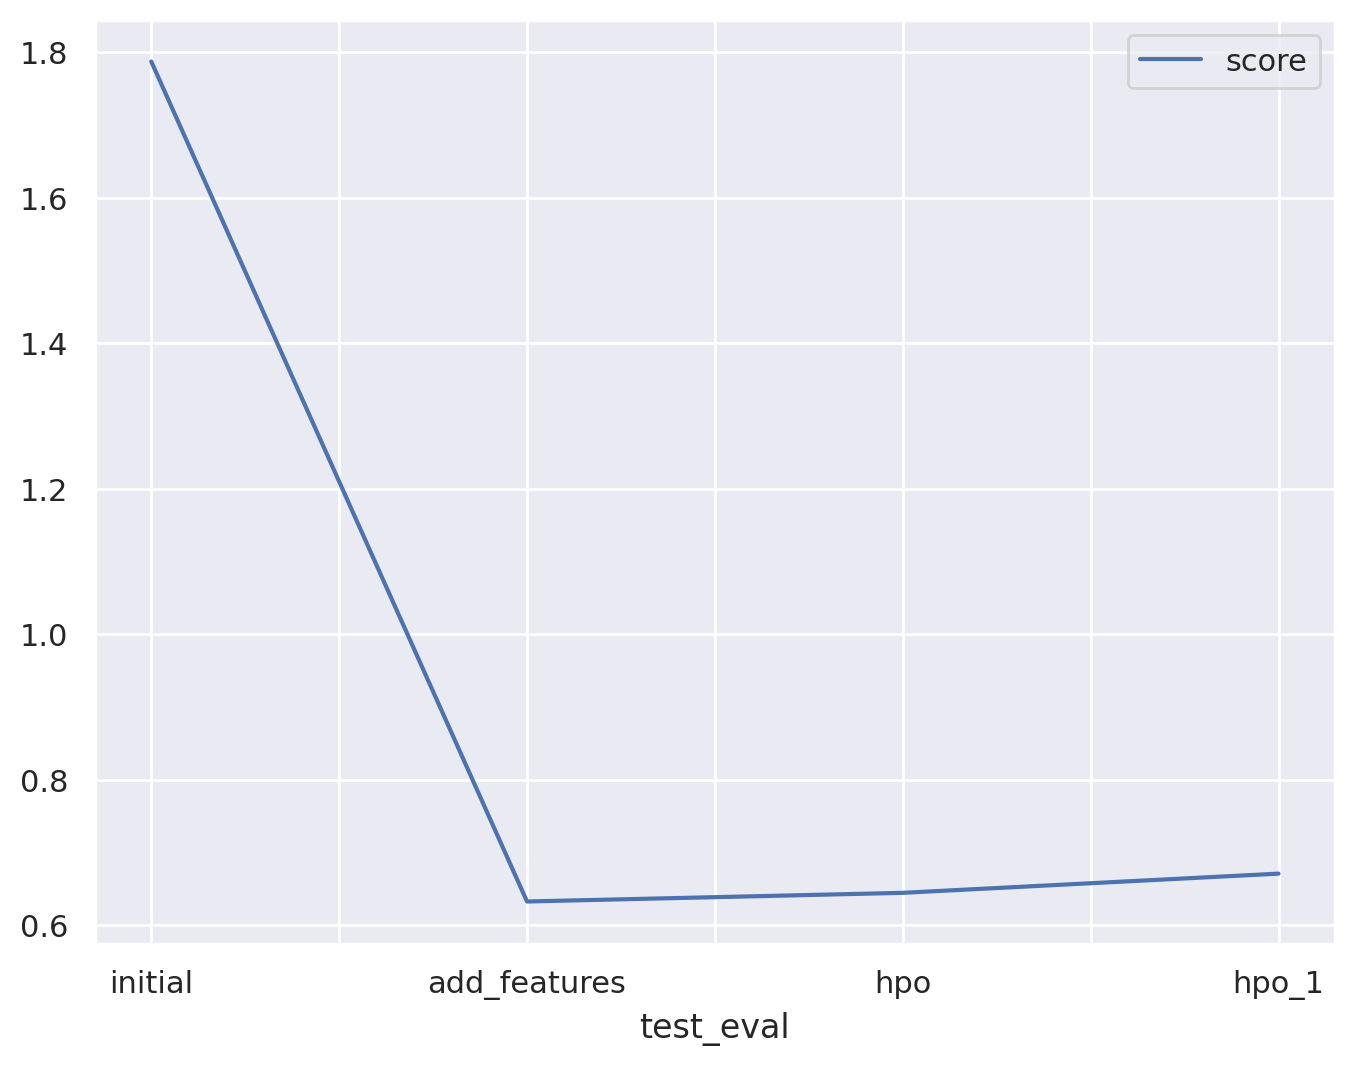

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo", "hpo_1"],
        "score": [1.78725, 0.63239, 0.64431, 0.67070]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo", "hpo_1"],
    "time_limit": [600, 600, 600, 1200],
    "eval_metric": ["root_mean_squared_error", "root_mean_squared_error", "r2", "root_mean_squared_error"],
    "score": [1.78725, 0.63239, 0.64431, 0.67070]
})

,model,time_limit,eval_metric,score
0,initial,600,root_mean_squared_error,1.78725
1,add_features,600,root_mean_squared_error,0.63239
2,hpo,600,r2,0.64431
3,hpo_1,1200,root_mean_squared_error,0.67070


### Additional charts

<Axes: xlabel='model'>

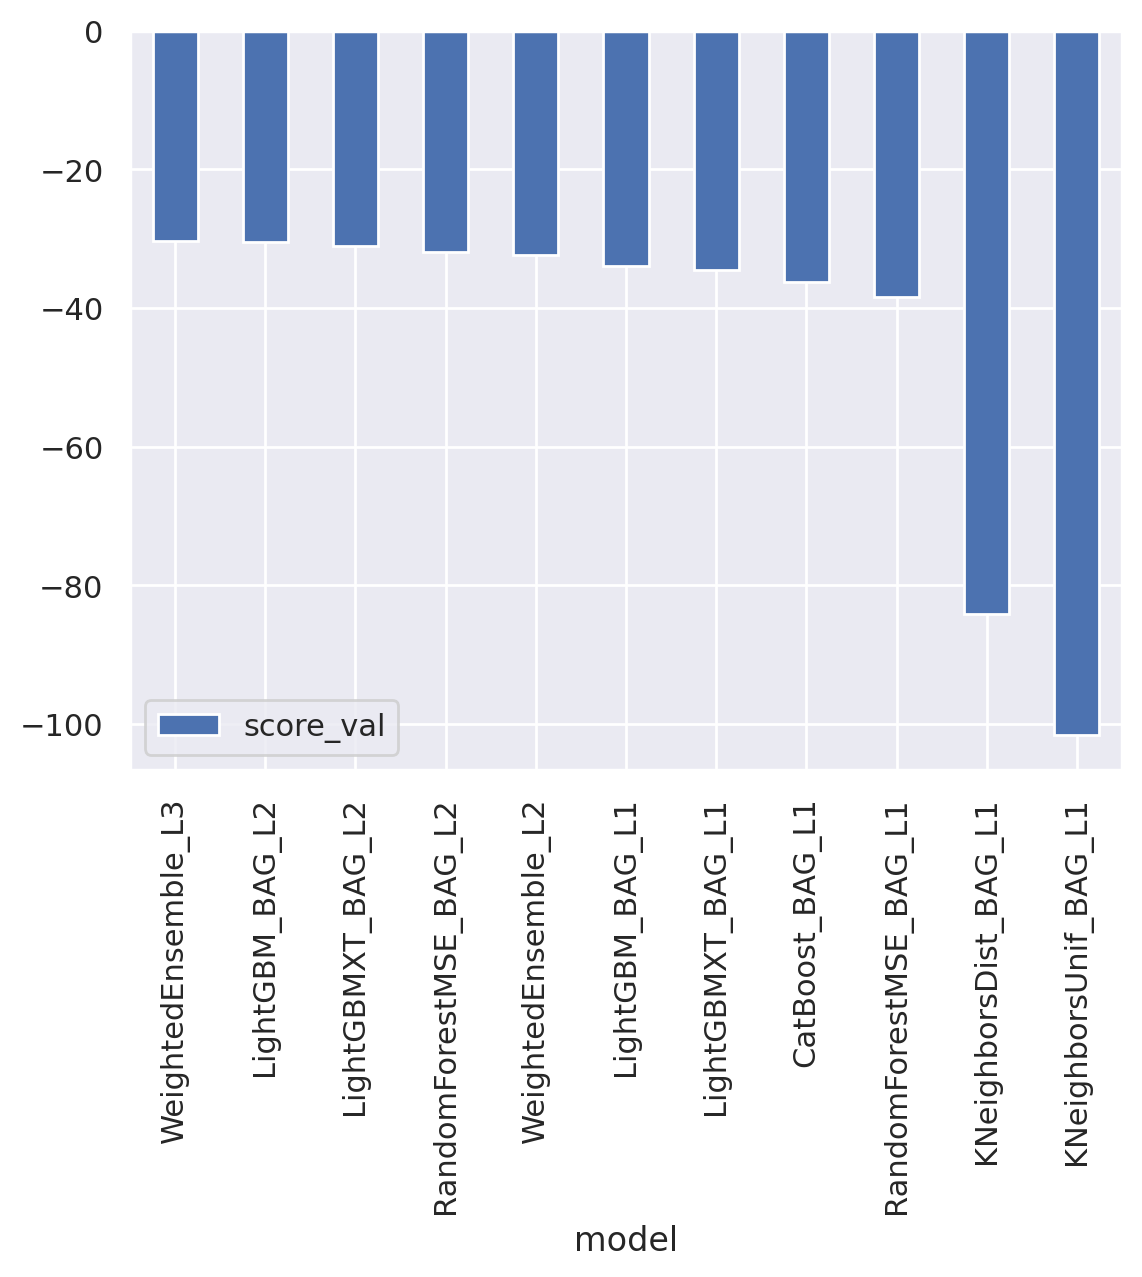

In [ ]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

<Axes: xlabel='model'>

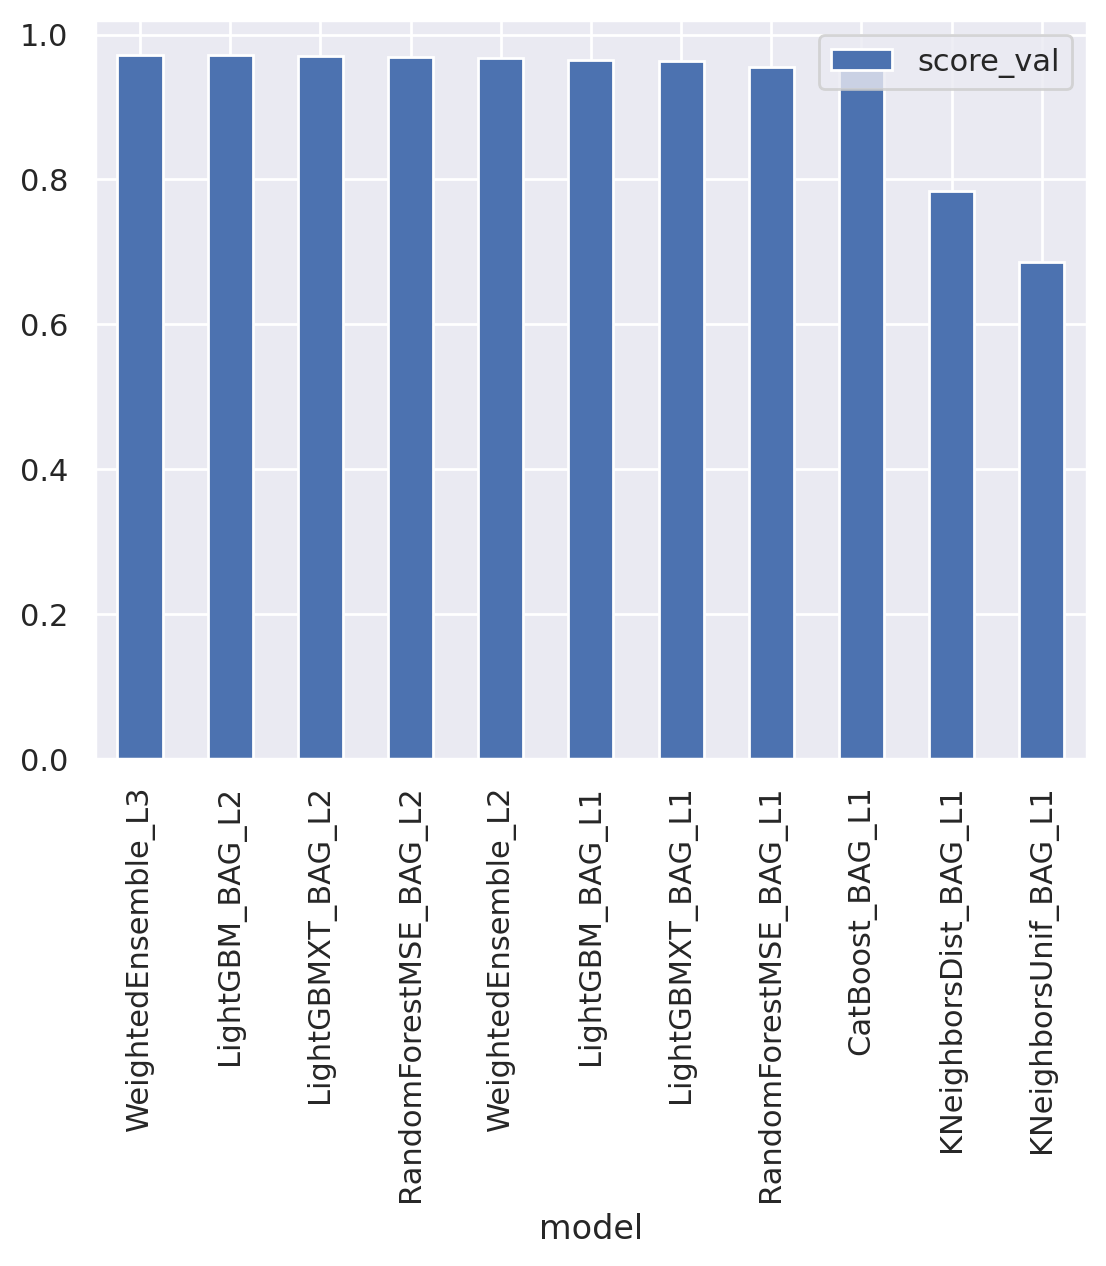

In [ ]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

<Axes: xlabel='model'>

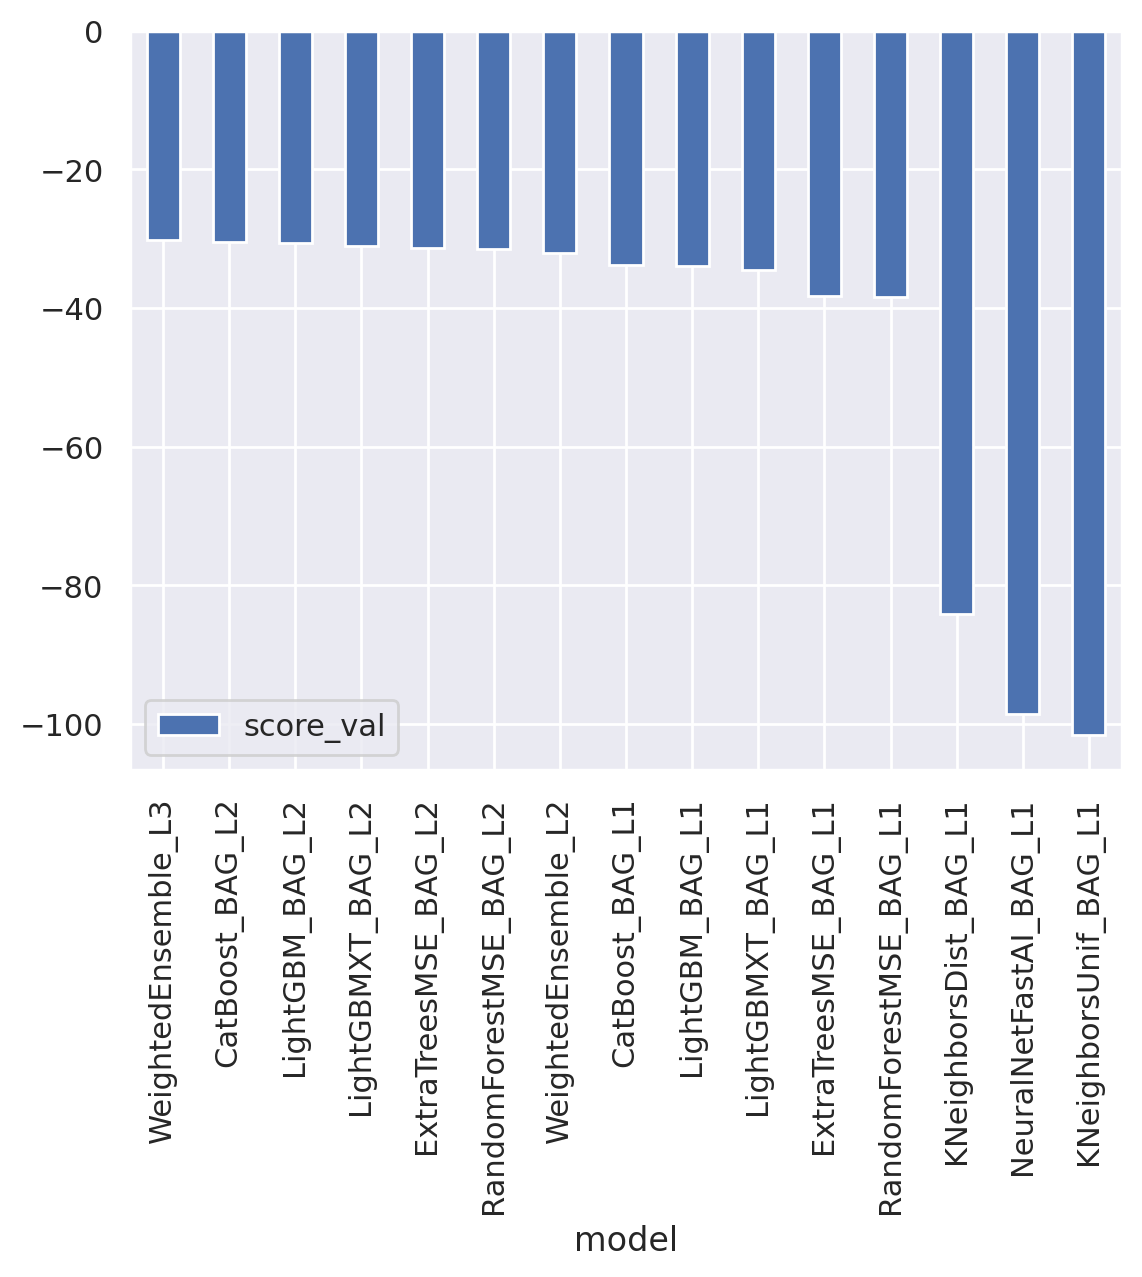

In [ ]:
predictor_new_hpo_1.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

<Axes: xlabel='model'>

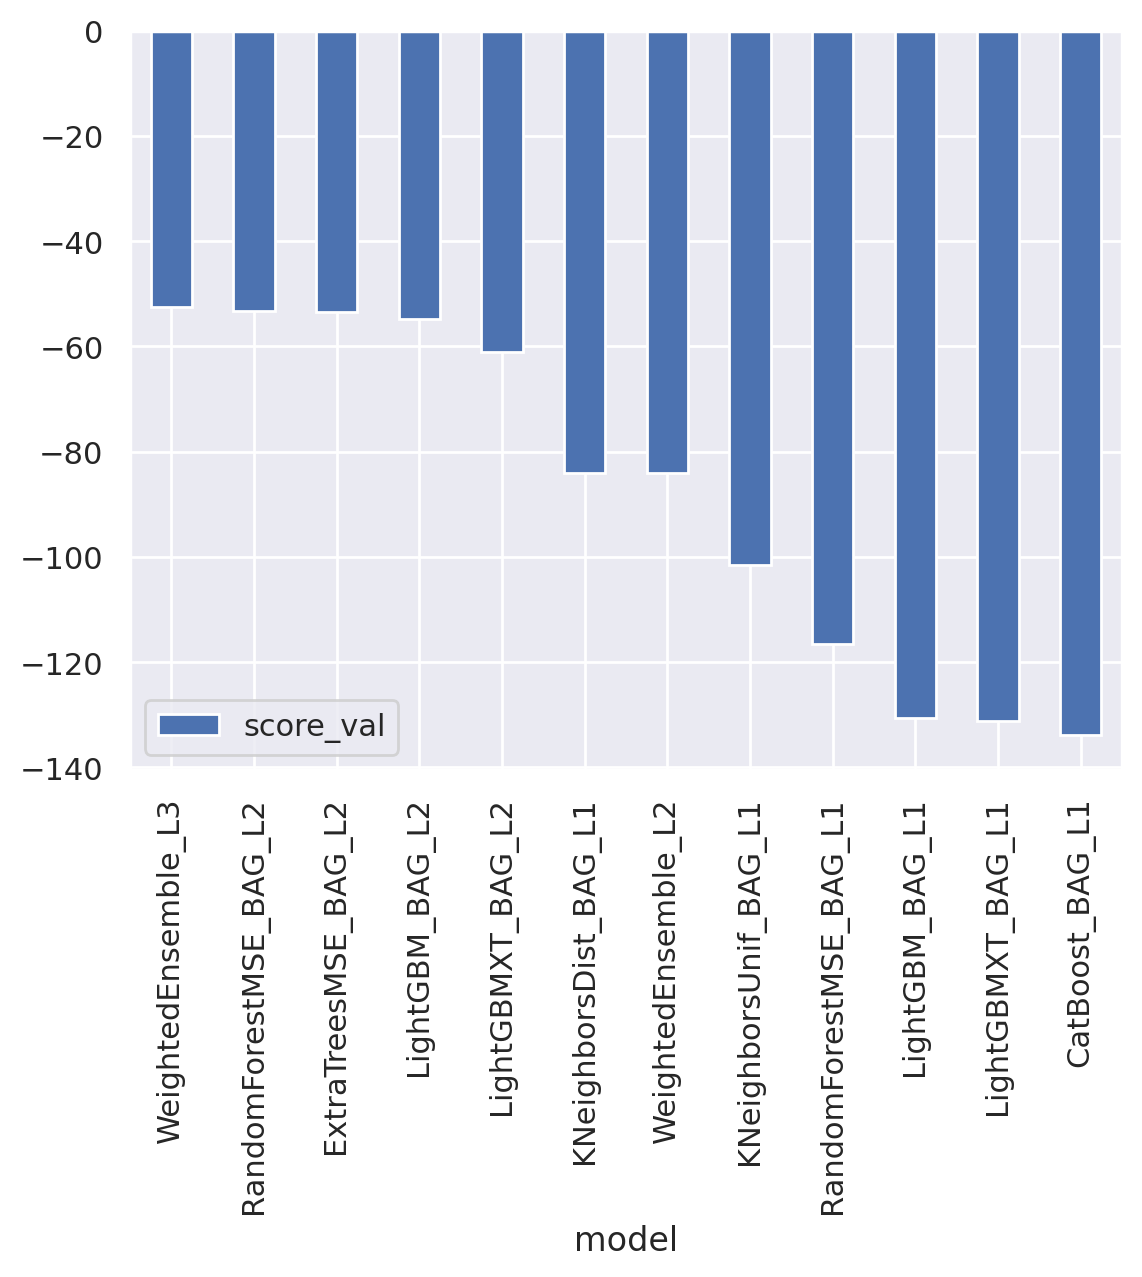

In [ ]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")